# Introduction to NumPy

    Understanding Data Types in Python
    The Basics of NumPy Arrays
    Computation on NumPy Arrays: Universal Functions

## Understanding Data Types in Python

**NumPy** (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.

In [3]:
import numpy as np

In [4]:
np?

Effective data-driven science and computation requires understanding how data is stored and manipulated. This section outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this. 

Understanding this difference is fundamental

The standard Python implementation is written in C. This means that every Python object is simply a **cleverly-disguised C structure**, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as x = 10000, x is not just a "raw" integer. It's actually a pointer to a compound C structure, which contains several values.

A single integer in Python 3.4 actually contains four pieces:

**ob_refcnt**, a reference count that helps Python silently handle memory allocation and deallocation

**ob_type**, which encodes the type of the variable

**ob_size**, which specifies the size of the following data members

**ob_digit**, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C, as illustrated in the following figure:

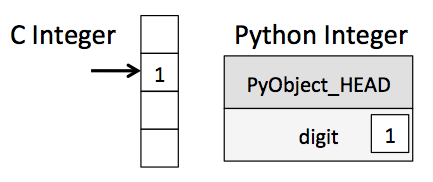

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value. A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.

A list is a Python data structure that holds many Python objects. We can use it to hold integers, strings, other lists, or a mix of different Python objects. 

This flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. 

In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.

The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

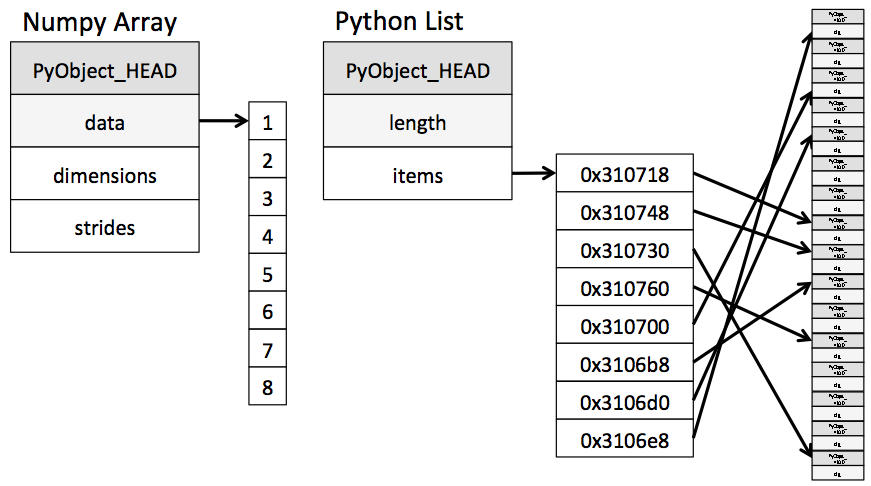

At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier.

Python provides it's own array object, but the ndarray object of the NumPy package is much more powerful. While Python's array object provides efficient storage of array-based data, NumPy adds to this **efficient operations** on that data.

First, we can use **np.array** to create arrays from Python lists:

In [5]:
np.array([1,3,4,5])

array([1, 3, 4, 5])

Remember that unlike Python lists, NumPy is constrained to arrays that **all contain the same type**. If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [6]:
np.array([3.14, 4, 2, 3])

array([ 3.14,  4.  ,  2.  ,  3.  ])

If we want to explicitly set the data type of the resulting array, we can use the **dtype** keyword:

In [7]:
np.array([1,4,5,8], dtype='float32')

array([ 1.,  4.,  5.,  8.], dtype=float32)

Finally, unlike Python lists, NumPy arrays can explicitly be multi-dimensional; here's one way of initializing a multidimensional array using a list of lists:

In [8]:
# nested lists result in multi-dimensional arrays

ar1 = np.array([range(i, i + 3) for i in [2, 4, 6]])
ar2 = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [9]:
ar1

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [10]:
ar2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
#zero vector

np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
#zero 2D Array

np.zeros((3,5), dtype = int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [13]:
#3x5 array filled with ones

np.ones((3,5), dtype = float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [14]:
#3x5 array filled with 3.14

np.full((3,5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

The **np.arange()** function create an array filled with a linear sequence; works similar to Python's range function. The one below starts at 0, ends at 20(not included) and steps by 2;

In [15]:
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

The **np.linspace()** function creates an array of n values evenly space on an interval.

In [16]:
np.linspace(0,1,5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

**np.random.random()** will create an array of uniformly distributed random values between 0 and 1;

In [17]:
np.random.random(10)

array([ 0.60248479,  0.75664452,  0.55839956,  0.54154002,  0.95238531,
        0.04211668,  0.60958285,  0.01204813,  0.69473819,  0.19575384])

In [18]:
np.random.random((3,5))

array([[ 0.51676821,  0.5123452 ,  0.60097002,  0.13156338,  0.49052564],
       [ 0.0108195 ,  0.26378052,  0.18045237,  0.17366973,  0.85019667],
       [ 0.27814413,  0.7549444 ,  0.7269809 ,  0.02166853,  0.01646853]])

**np.random.normal()** will create an array of normally distributed random values with a mean of mu and SD of sigma.

In [19]:
np.random.normal(0, 1, (3,3)) #mu=0, sd=1

array([[ 1.38776344,  0.24495409, -1.48199741],
       [-0.12522919,  0.47059238,  1.02537822],
       [ 1.24923029,  0.0189203 , -0.302779  ]])

In [20]:
np.random.normal(5, 0.5, (3,5)) #mu=5, sd=0.5

array([[ 3.99852438,  5.04903465,  4.60472177,  5.65283675,  4.762303  ],
       [ 5.44891418,  4.06114347,  4.54166406,  5.81744731,  3.77651928],
       [ 4.94482798,  4.75648004,  5.31294325,  4.35698644,  5.11140818]])

**np.random.randint()**  creates an array of random integers in a specified range, non inclusive of the right number.

In [21]:
np.random.randint(0,10, (3,3)) #so this is from 1 to 10, not including 10

array([[6, 8, 9],
       [2, 5, 0],
       [6, 7, 1]])

**np.eye()** will create an identity matric, a square matrix with 1s along the diagonal. 

In [22]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.

When constructing an array the type can be specified using a string or the associated NumPy object.

In [23]:
np.zeros(10, dtype='int16')
#there are the same
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

Below are the types of NumPy data and their descriptions;

**bool_**	Boolean (True or False) stored as a byte

**int_**	Default integer type (same as C long; normally either int64 or int32)

**intc**	Identical to C int (normally int32 or int64)

**intp**	Integer used for indexing (same as C ssize_t; normally either int32 or int64)

**int8**	Byte (-128 to 127)

**int16**	Integer (-32768 to 32767)

**int32**	Integer (-2147483648 to 2147483647)

**int64**	Integer (-9223372036854775808 to 9223372036854775807)

**uint8**	Unsigned integer (0 to 255)

**uint16**	Unsigned integer (0 to 65535)

**uint32**	Unsigned integer (0 to 4294967295)

**uint64**	Unsigned integer (0 to 18446744073709551615)

**float_**	Shorthand for float64.

**float16**	Half precision float: sign bit, 5 bits exponent, 10 bits mantissa

float32	Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
float64	Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
complex_	Shorthand for complex128.
complex64	Complex number, represented by two 32-bit floats
complex128	Complex number, represented by two 64-bit floats

## The Basics of Numpy Arrays

While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples.

Basic array manipulations:

**Attributes of arrays:** Determining the size, shape, memory consumption, and data types of arrays

**Indexing of arrays:** Getting and setting the value of individual array elements

**Slicing of arrays:** Getting and setting smaller subarrays within a larger array

**Reshaping of arrays:** Changing the shape of a given array

**Joining and splitting of arrays:** Combining multiple arrays into one, and splitting one array into many

In [24]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [25]:
x1

array([5, 0, 3, 3, 7, 9])

In [26]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [27]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes **ndim** (the number of dimensions), **shape** (the size of each dimension), and **size** (the total size of the array):

In [28]:
print("x1 ndim: ", x1.ndim)
print("x2 ndim: ", x2.ndim)
print("x3 ndim: ", x3.ndim)

print("x1 shape:", x1.shape)
print("x2 shape:", x2.shape)
print("x3 shape:", x3.shape)

print("x1 size: ", x1.size)
print("x2 size: ", x2.size)
print("x3 size: ", x3.size)

x1 ndim:  1
x2 ndim:  2
x3 ndim:  3
x1 shape: (6,)
x2 shape: (3, 4)
x3 shape: (3, 4, 5)
x1 size:  6
x2 size:  12
x3 size:  60


Another useful attribute is the **dtype**, the data type of the array.

In [29]:
print('x1 dtype: ', x1.dtype)
print('x2 dtype: ', x2.dtype)
print('x3 dtype: ', x3.dtype)

x1 dtype:  int64
x2 dtype:  int64
x3 dtype:  int64


Other attributes include **itemsize**, which lists the size (in bytes) of each array element, and **nbytes**, which lists the total size (in bytes) of the array:

In [30]:
print("x1 itemsize:", x1.itemsize, "bytes")
print("x2 itemsize:", x2.itemsize, "bytes")
print("x3 itemsize:", x3.itemsize, "bytes")
print("x1 nbytes:", x1.nbytes, "bytes")
print("x2 nbytes:", x2.nbytes, "bytes")
print("x3 nbytes:", x3.nbytes, "bytes")

x1 itemsize: 8 bytes
x2 itemsize: 8 bytes
x3 itemsize: 8 bytes
x1 nbytes: 48 bytes
x2 nbytes: 96 bytes
x3 nbytes: 480 bytes


In general, we expect that **nbytes** is equal to **itemsize** times **size**.

In [31]:
x1.itemsize * x1.size == x1.nbytes

True

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar. In a one-dimensional array, the ithith value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [32]:
x1

array([5, 0, 3, 3, 7, 9])

In [33]:
x1[0]

5

In [34]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [35]:
x1[-2]

7

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [36]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [37]:
x2[0, 1] #row then column

5

In [38]:
x2[2, 0] #row then column

1

In [39]:
x2[2, -1] #row then column

7

In [40]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

In [41]:
x3[0,1,2] #first dem, then row, the column

3

Values can also be modified using any of the above index notation:

In [42]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated.

In [43]:
x1

array([5, 0, 3, 3, 7, 9])

In [44]:
x1[0] = 3.1459 #turn into 3
x1

array([3, 0, 3, 3, 7, 9])

ust as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character. The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array x, use this:

**x[start:stop:step]**

In [45]:
x1[0] = 5
x1

array([5, 0, 3, 3, 7, 9])

In [46]:
x1[:3] #first three elements

array([5, 0, 3])

In [47]:
x1[3:] #all elements after index three

array([3, 7, 9])

In [48]:
x1[2:4] #middle sub-array

array([3, 3])

In [49]:
x1[::2] #every other element

array([5, 3, 7])

In [50]:
x1[1::2]  # every other element, starting at index 1

array([0, 3, 9])

A potentially confusing case is when the step value is negative. In this case, the **defaults for start and stop are swapped**. This becomes a convenient way to reverse an array:

In [51]:
x1[::-1] #reversed

array([9, 7, 3, 3, 0, 5])

In [52]:
x1[3::-2] #every other reversed from index 3

array([3, 0])

Multi-dimensional slices work in the same way, with multiple slices separated by commas. For example:

In [53]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [54]:
x2[:2, :3] #two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [55]:
x2[:, ::2] #all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Finally, subarray dimensions can even be reversed together:

In [56]:
x2[::-1, ::-1] #reversed

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

One commonly needed routine is accessing of single rows or columns of an array. 

In [57]:
x2[:, 0] #first column

array([12,  7,  1])

In [58]:
x2[0, :] #first row

array([12,  5,  2,  4])

In the case of row access, the empty slice can be omitted for a more compact syntax:

In [59]:
x2[0] #same as x2[0, :]

array([12,  5,  2,  4])

One important–and extremely useful–thing to know about array slices is that they **return views rather than copies** of the array data.

In [60]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [61]:
x2_sub = x2[:2, :2]
x2_sub

array([[12,  5],
       [ 7,  6]])

Now if we modify this subarray, we'll see that the original array is changed! 

In [62]:
x2_sub[0,0] = 99
x2_sub

array([[99,  5],
       [ 7,  6]])

In [63]:
x2 #changed!

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the copy() method:

In [64]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[99,  5],
       [ 7,  6]])

In [65]:
x2_sub_copy[0,0] = 42
x2_sub_copy

array([[42,  5],
       [ 7,  6]])

In [66]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the **reshape** method. For example, if you want to put the numbers 1 through 9 in a 3×3 grid, you can do the following:

In [67]:
grid = np.arange(1,10).reshape((3,3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Note that for this to work, the size of the initial array must match the size of the reshaped array.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. 

This can be done with the **reshape** method, or **more easily done by making use of the newaxis keyword within a slice operation**:

In [68]:
x = np.array([1,2,3])
x.reshape((1,3)) #row vector

array([[1, 2, 3]])

In [69]:
x[np.newaxis, :] #row vector

array([[1, 2, 3]])

In [70]:
x.reshape((3, 1)) #column vector

array([[1],
       [2],
       [3]])

In [71]:
x[:, np.newaxis] #column vector

array([[1],
       [2],
       [3]])

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays.

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines **np.concatenate**, **np.vstack**, and **np.hstack**.

In [72]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
#takes a tuple or list of arrays as its first argument
np.concatenate([x,y]) 

array([1, 2, 3, 3, 2, 1])

In [73]:
z = [99, 98, 57]
np.concatenate([x,y,z])

array([ 1,  2,  3,  3,  2,  1, 99, 98, 57])

In [74]:
#It can also be used for two-dimensional arrays
grid = np.array([[1,2,3], [4,5,6,]])

np.concatenate([grid, grid]) #done along first axis, stack them

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [75]:
np.concatenate([grid, grid], axis=1) #done along the second axis, side by side

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the **np.vstack** (vertical stack) and **np.hstack** (horizontal stack) functions:

In [76]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [77]:
y = np.array([[99],
              [99]])

np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, **np.dstack** will stack arrays along the third axis. Equivalent to np.concatenate(tup, axis=2) if tup contains arrays that are at least 3-dimensional.

In [78]:
a = np.array([1,2,3])
b = np.array([2,3,4])

c = np.dstack([a,b])

c

array([[[1, 2],
        [2, 3],
        [3, 4]]])

In [79]:
c.ndim

3

The opposite of concatenation is splitting, which is implemented by the functions **np.split**, **np.hsplit**, and **np.vsplit**. For each of these, we can pass a list of indices giving the split points:

In [80]:
x = [1, 2, 3, 99, 99, 3, 2, 1]

x1, x2, x3 = np.split(x, [3, 5])

print(x1, x2, x3)
print(x1 == x[:3], x[:3])
print(x2 == x[3:5], x[3:5])
print(x3 == x[5:], x[5:])

[1 2 3] [99 99] [3 2 1]
[ True  True  True] [1, 2, 3]
[ True  True] [99, 99]
[ True  True  True] [3, 2, 1]


Notice that *N* split-points, leads to *N + 1* subarrays. The related functions np.hsplit and np.vsplit are similar:

In [81]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [82]:
top, bottom = np.vsplit(grid, [2])
print(top)
print(bottom)
print('')
print(grid[:2])
print(grid[2:])

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [83]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)
print('')
print(grid[:,:2])
print(grid[:,2:])

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, np.dsplit will split arrays along the third axis.

In [84]:
j, k = np.dsplit(c, [1])
print(c)
print('')
print(j)
print('')
print(k)

[[[1 2]
  [2 3]
  [3 4]]]

[[[1]
  [2]
  [3]]]

[[[2]
  [3]
  [4]]]


## Computation on NumPy Arrays: Universal Function

Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy's universal functions (ufuncs). 

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element. 

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. 

In [85]:
np.arange(5) / np.arange(1, 6)

array([ 0.        ,  0.5       ,  0.66666667,  0.75      ,  0.8       ])

In [86]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.

**Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.**

Ufuncs exist in two flavors: **unary ufuncs**, which operate on a single input, and **binary ufuncs**, which operate on two inputs. 

The standard addition, subtraction, multiplication, and division can all be used:

In [89]:
x = np.arange(4)
print("x      =", x)
print("x  + 5 =", x + 5)
print("x  - 5 =", x - 5)
print("x  * 2 =", x * 2)
print("x  / 2 =", x / 2)
print("x // 2 =", x // 2)

x      = [0 1 2 3]
x  + 5 = [5 6 7 8]
x  - 5 = [-5 -4 -3 -2]
x  * 2 = [0 2 4 6]
x  / 2 = [ 0.   0.5  1.   1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ** operator for exponentiation, and a % operator for modulus:

In [90]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the + operator is a wrapper for the add function:

In [91]:
np.add(x,2)

array([2, 3, 4, 5])

In [92]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is **np.absolute**, which is also available under the alias **np.abs**:

In [103]:
print(all(np.absolute(x) == np.abs(x)))

np.abs(x)

True


array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [104]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([ 5.,  5.,  2.,  1.])

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions. We'll start by defining an array of angles:

In [105]:
theta = np.linspace(0, np.pi, 3)

In [106]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [ 0.          1.57079633  3.14159265]
sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]
cos(theta) =  [  1.00000000e+00   6.12323400e-17  -1.00000000e+00]
tan(theta) =  [  0.00000000e+00   1.63312394e+16  -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.

In [107]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [ 3.14159265  1.57079633  0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


Another common type of operation available in a NumPy ufunc are the exponentials:

In [108]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [  2.71828183   7.3890561   20.08553692]
2^x   = [ 2.  4.  8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available. The basic np.log gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [109]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [ 0.          0.69314718  1.38629436  2.30258509]
log2(x)  = [ 0.          1.          2.          3.32192809]
log10(x) = [ 0.          0.30103     0.60205999  1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [110]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [ 0.          0.0010005   0.01005017  0.10517092]
log(1 + x) = [ 0.          0.0009995   0.00995033  0.09531018]


When x is very small, these functions give more precise values than if the raw np.log or np.exp were to be used.

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule **scipy.special**. If you want to compute some obscure mathematical function on your data, chances are it is implemented in scipy.special.

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function:

In [111]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[  0.  10.  20.  30.  40.]


This can even be used with array views. For example, we can write the results of a computation to every other element of a specified array:

In [112]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


If we had instead written y[::2] = 2 \*\* x, this would have resulted in the creation of a temporary array to hold the results of 2 \*\* x, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but **for very large arrays the memory savings from careful use of the out argument can be significant**.

For example, if we'd like to reduce an array with a particular operation, we can use the **reduce** method of any ufunc. A reduce **repeatedly applies a given operation to the elements of an array until only a single result remains**.

For example, calling reduce on the add ufunc returns the sum of all elements in the array:

In [114]:
x = np.arange(1,6)
np.add.reduce(x)

15

In [115]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use **accumulate**:

In [117]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [118]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

Note that for these particular cases, there are dedicated NumPy functions to compute the results (**np.sum**, **np.prod**, **np.cumsum**, **np.cumprod**)

Finally, any ufunc can compute the output of all pairs of two different inputs using the **outer** method. This allows you, in one line, to do things like create a multiplication table:

In [119]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])